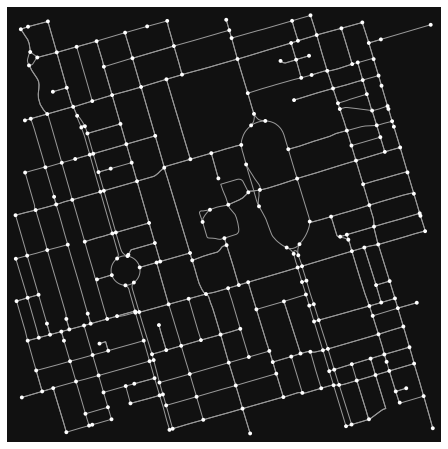

In [25]:
import networkx as nx
import osmnx
import matplotlib.pyplot as plt
from search_optimization_tools.algorithms import Kruskal

reference = (43.661667, -79.395)
G = osmnx.graph_from_point(
    reference, dist=1000, clean_periphery=True, simplify=True, network_type="drive"
)
fig, ax = osmnx.plot_graph(G)


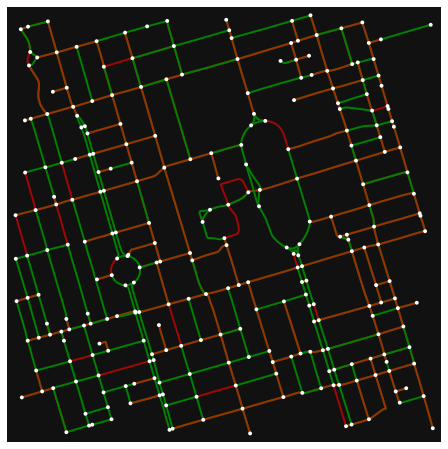

In [26]:
sorted_edges = sorted(G.edges(data=True), key=lambda t: G[t[0]][t[1]][0]["length"])

mst = Kruskal(G, sorted_edges=True, edges=sorted_edges, graph_type=nx.MultiDiGraph)

highlight_edges = ["g" if e in mst.edges else "r" for e in G.edges]
edge_alphas = [1 if e in mst.edges else 0.6 for e in G.edges]
osmnx.plot_graph(
    G, edge_linewidth=2, edge_color=highlight_edges, edge_alpha=edge_alphas
)
plt.show()
